## Boston Housing Linear Regression Model

Linear Regression Model will be used to predict the price of housing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset
boston_df = pd.read_csv("BostonHousing.csv")

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Exploratory Data Analysis

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston_df.isna().sum() #gives num of empty observations/examples for given features 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
boston_df_cleaned = boston_df.dropna() #remove empty examples

In [7]:
boston_df_cleaned.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
boston_df_cleaned.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# find correlation coefficients
corr_boston = boston_df_cleaned.corr().round(2) # round the correlation coeffs upto 2 decimal places 

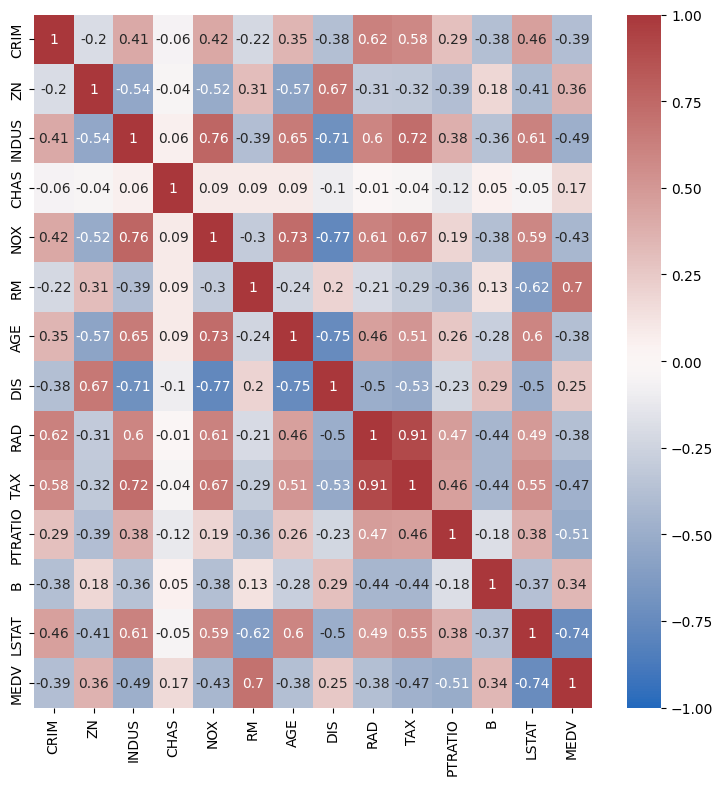

In [10]:
# make a heatmap for the given correlation coeffs
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(data = corr_boston, vmin = -1, vmax = 1, center=0, annot = True, cmap='vlag')
plt.show()


In [11]:
# numerical determination
abs(corr_boston.MEDV) > 0.5

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO     True
B          False
LSTAT       True
MEDV        True
Name: MEDV, dtype: bool

In [12]:
# more concisely
print(boston_df_cleaned.corr().abs().nlargest(3, 'MEDV').index) # find the 3 largest corrs wrt MEDV

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')


Thus, the top predictive variables to predict the median house value `MEDV` are `LSTAT`(% lower status) and & `RM`(no. of rooms)

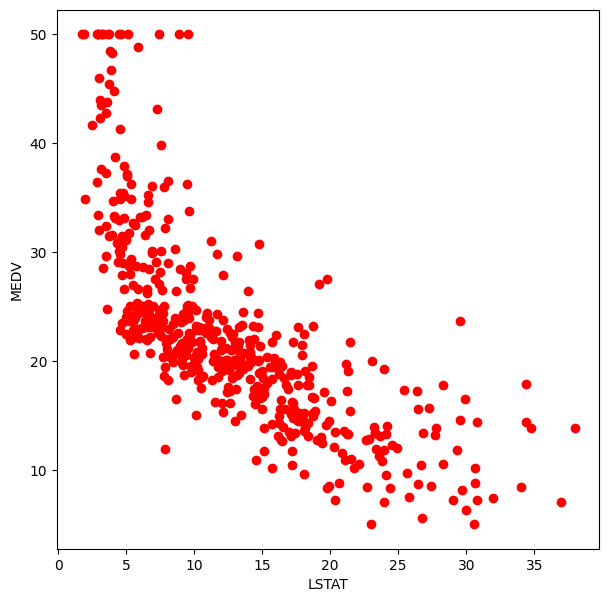

In [13]:
# visualize relationship btw LSTAT and MEDV using scatterplot
plt.figure(figsize=(7,7))
plt.scatter(x = boston_df_cleaned['LSTAT'], y = boston_df_cleaned['MEDV'], marker = 'o', c = 'red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

Hence, we see a negative correlation

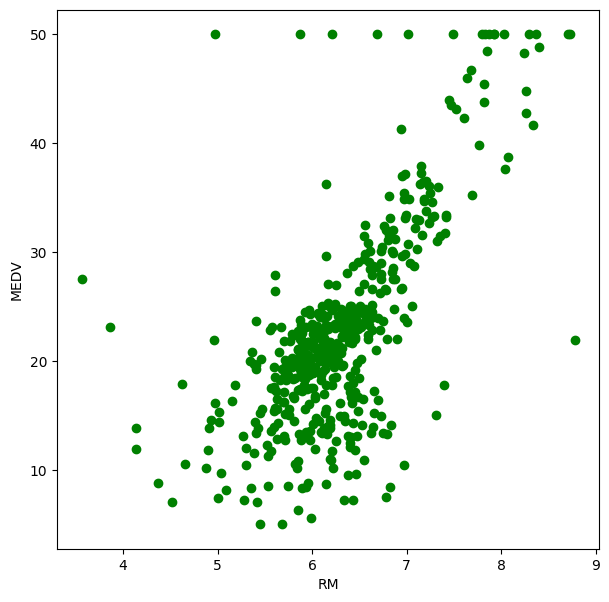

In [14]:
# visualize relationship btw RM and MEDV using scatterplot
plt.figure(figsize=(7,7))
plt.scatter(x = boston_df_cleaned['RM'], y = boston_df_cleaned['MEDV'], marker = 'o', c = 'green')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

Here, we see a positive correlation

Text(0.5, 0, 'MEDV')

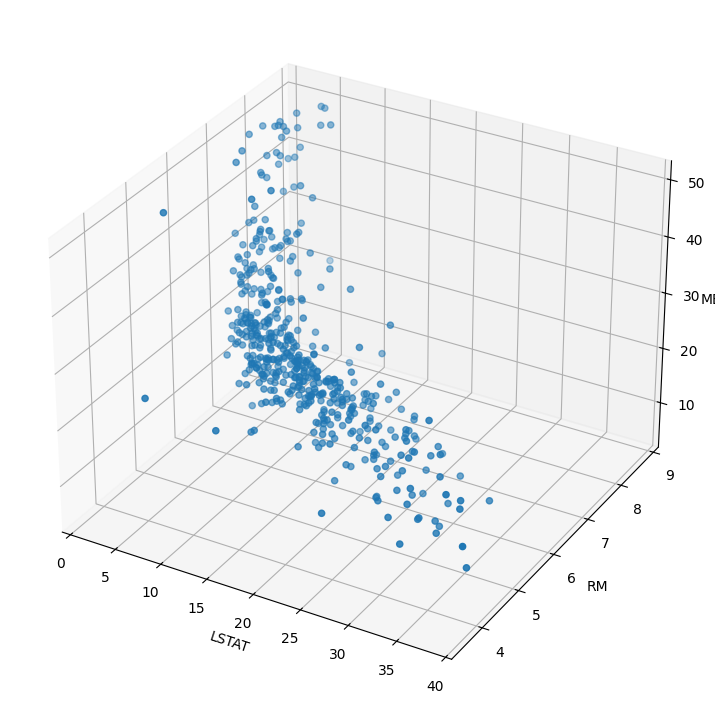

In [15]:
# making a 3D scatterplot
from mpl_toolkits.mplot3d import Axes3D

# creating objects
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')

# making the scatter plot
ax.scatter3D(boston_df_cleaned['LSTAT'], boston_df_cleaned['RM'], boston_df_cleaned['MEDV'])
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

## Training Model

In [16]:
# define features = LSTAT and RM
X = pd.DataFrame(np.c_[boston_df_cleaned['LSTAT'], boston_df_cleaned['RM']], columns = ['LSTAT','RM'])
print(X.head())

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147


In [17]:
# define the target
y = boston_df_cleaned['MEDV']
print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [18]:
# create training and test data
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 5)

In [19]:
print(X_train.shape)
print(y_train.shape)

(375, 2)
(375,)


In [20]:
# creating the said model
from sklearn.linear_model import LinearRegression as LR

housing_model = LR()
housing_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
print(housing_model.coef_) # gives slopes w1 and w2 for y = w1x + w2x + b
print(housing_model.intercept_)

[-0.6433015   4.50862125]
2.5394626212642244


In [ ]:
# model evaluation

price_pred = housing_model.predict(X_test)

# for corr coeff = R: 
print('R-squared: %.4f'%housing_model.score(X_test, y_test))



R-squared: 0.7066


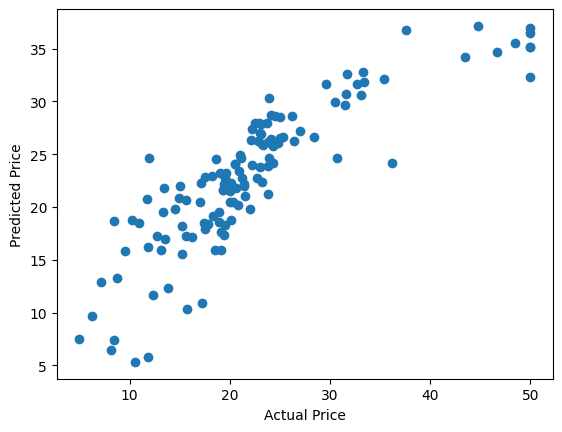

In [23]:
# visualizing the errors
plt.scatter(x = y_test, y = price_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [26]:
# finding MSE
from sklearn.metrics import mean_squared_error as MSE

Err = MSE(y_test, price_pred)
print(Err)

27.353134363631565
